# Fitting Models to Data
***

In the laboratory and in science in general, we want to figure out the ***relationship*** between different things we measure. Often, we want to test if the data follows some **model**, or assume some model to try to figure out some unknown quantity. This, and many more things, can be done with the SciPy package.

The easiest way to do so is using **curve_fit()** function from **scipy.optimize** toolbox.

First, import **curve_fit**:

In [7]:
from scipy.optimize import curve_fit

## `curve_fit()`

The **curve_fit()** function is used like this:

   `p, cov = curve_fit( model,  xdata,  ydata,  sigma=y_error,  p0=initial_guess,  absolute_sigma=True )`

Let's break this function down.

#### INPUT :

* The **model** is the function we try to fit for our data. <br>A lot of the time, we try to fit a straight line, so our model is **y = A + Bx**. The parameters we try to figure out are then **A** and **B**. 
* **xdata** and **ydata** are the measured data values. They can be Pandas columns, Python lists or Numpy arrays.
* **sigma** is the list of uncertainties in y. <br> Unfortunately, **curve_fit** can't easily account for uncertainties in x. You can see how to do it in [**X-uncertainties** tutorial!](4%20X-uncertainties.ipynb)
* **p0** is your initial guess for the values of A, B (and more, for more complex fits). This helps the algorithm find the correct values.
* **absolute_sigma** is a slightly complicated parameter. See [**Absolute Sigma** guide](3%20Absolute%20Sigma.ipynb) for more details. The rule of thumb is:
    * If you pass some uncertainties using `sigma=...`, set `absolute_sigma=True`
    * If you do not know uncertainties, set `absolute_sigma=False`

#### OUTPUT :
The function *returns* two objects that we save to variables **p** and **cov**.

* **p** is the guess for our parameters: **p = [A, B]** or p=[A, B, C ...] for more complex fits
* **cov** is something called *covariance matrix*. You don't need to worry about the whole thing for now, but this is where we get the uncertainty estimates on **A** and **B**. [See **Covariance matrix** guide if you're curious](2%20Covariance%20Matrix.ipynb)

If we output **p** and **cov** this way, then we get **A**, **B** and their uncertainties using

$$ \textrm{A} = \textrm{p}[0] \quad \textrm{and} \quad \textrm{B} = \textrm{p}[1] $$

$$ \delta \textrm{A} = \sqrt{\textrm{cov}[0,0] } \quad\textrm{and}\quad \delta \textrm{B} = \sqrt{\textrm{cov}[1,1]} $$


#### Example: Gravitational Acceleration

Imagine, we got a force plate and measured the force with which different weights fall to the ground. Someone told us, that the relationship between the measured force and the mass should be something like

$$ F = 10 \times M $$

Our measurements are:

In [9]:
import numpy as np

masses = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])   # In kg
forces = np.array([1.2, 2.1, 3.2, 4.1, 5.1, 6.2, 6.9, 8.0, 9.1, 9.9])   # In N
dforce = np.array([0.1, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1])   # In N; something went wrong in trial 5!

So if we plot **Force** on y-axis and **Mass** on x-axis, we should get a straight line with the slope equal to **10**. <br>Let's plot this data first. If you're not sure how to do this, check out the [Plotting tutorials!](../4%20Plotting)

<ErrorbarContainer object of 3 artists>

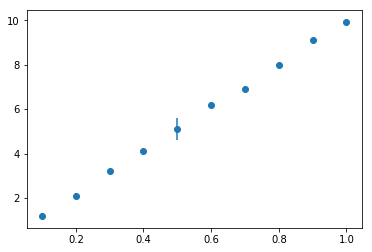

In [10]:
import matplotlib.pyplot as plt   # Importing the plotting toolbox
%matplotlib inline          
plt.errorbar(masses, forces, yerr=dforce, fmt="o")   # Creating a plot with errorbars

Now we want to fit a straight line using **curve_fit** function. 
The first thing we need to do is to define our model. We already know that the model is just a straight line: 

$$\textrm{Force} = A + B \times \textrm{Mass} $$

Based on our knowledge, we expect **A** to be nearly 0, and **B** to give us the density. <br>
[See why we still need to include (and think about!) A in **Intercept in Models** tutorial](1%20Intercept%20in%20Models.ipynb)

The **model** we pass to the **curve_fit** has to be defined as a **function**. <br>
[If you're not sure how this works, see the **Functions** tutorial!](../2%20Python%20Basics/3%20Functions.ipynb)


In [11]:
# The first parameter is always the x-data, the other parameters are to be estimated by curve fit
def my_line_model(x, A, B):   
    y = A + B*x                # Calculate the theoretical y-value predicted by the model
    return y                   # Return this y-value to curve_fit

Now, the curve fit will try to estimate the best possible values for **A** and **B** that make this function fit the data. <br>
Now that we have a function, we can finally use **curve_fit**!

In [12]:
# Run the curve_fit function.
# Remember the syntax: p, cov = curve_fit( model,  xdata,  ydata,  sigma,  p0=initial_guess,  absolute_sigma=True/False )

# Model          =   my linear model that I'll try to fit with, my_line_model
# xdata          =   masses
# ydata          =   forces
# sigma          =   dforce, uncertainty in the y variable
# p0             =   initial parameter guesses: A=0 (no intercept), B=10 (slope).
# absolute_sigma =   True because I know the force uncertainties

fit_param, fit_param_errors = curve_fit( my_line_model,  masses,  forces,  sigma=dforce,  
                    p0=[0, 10],  absolute_sigma=True )

Let's look at our results! (See [**String Formatting** guide](../2%20Python%20Basics/2%20String%20Formatting.ipynb) if you're not sure what did these `print` statements do)

In [13]:
import numpy as np    # To access the square root function

fitA = fit_param[0];  fitdA = np.sqrt(fit_param_errors[0,0])    # The value of A, the uncertainty in A
fitB = fit_param[1];  fitdB = np.sqrt(fit_param_errors[1,1])    # The value of B, the uncertainty in B

print("A (Intercept) = (%2.2f +/- %2.2f) N" %(fitA, fitdA))
print("B (Slope)     = (%2.2f +/- %2.2f) m/s2" %(fitB, fitdB))

A (Intercept) = (0.22 +/- 0.07) N
B (Slope)     = (9.75 +/- 0.11) m/s2


After just a few lines of code (and I promise, you will get the hang of it) we get our model!

$$ A = 0.22 \pm 0.07 \quad \textrm{and} \quad B = 9.8 \pm 0.1 $$

$$ \textrm{Force} = (-0.22 \pm 0.07) + (9.8 \pm 0.1) \times \textrm{Mass} $$

So the mysterious acceleration we measured was **9.8 +/- 0.1 m/s2 ** and not 10! Cool, right? Let's plot the line of best fit on the graph! <br>
[See a detailed example of the line of best fit plot in the **Best Fit Plot** tutorial!](../4%20Plotting/5%20Best%20Fit%20Plot.ipynb)

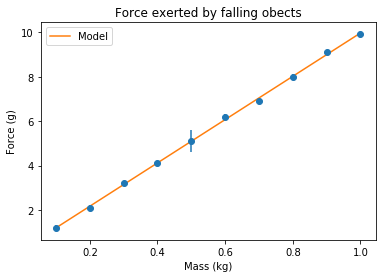

In [14]:
plt.errorbar(masses, forces, yerr=dforce, fmt="o")   # Creating a plot of raw data with errorbars
plt.plot(    masses, my_line_model(masses,fitA,fitB), label="Model")  #Plot the fit model: x=golf_volumes, y=model fit results

plt.xlabel("Mass (kg)")
plt.ylabel("Force (g)")
plt.title("Force exerted by falling obects")
plt.legend()

And that's it! It is a lot, but you will soon get the hang of it. Good luck :)